# Analysis of Top 10000 Companies

### Content
+ Introduction: Top 10000 Companies
+ Data description and objectives
+ Research questions
+ Data preparation, acquisiton, manipulation and validation
+ Data analysis and visualization 
+ Conclusion

## 1. Introduction: Top 10000 Companies

The "Top 10000 Companies Dataset" stands as a comprehensive compilation that offers profound insights into the corporate landscape, encompassing an extensive array of companies across diverse industries. This dataset proves to be an invaluable resource, shedding light on crucial aspects such as reputation, ratings, and various other pertinent factors that are pivotal in assessing the standing and performance of these organizations.

This dataset serves as a goldmine for individuals and entities engaged in diverse pursuits. For job seekers and career enthusiasts, it provides a nuanced understanding of the professional landscape, enabling them to make informed decisions regarding potential employers. Ratings and reputation metrics within the dataset serve as beacons, guiding individuals toward companies that align with their career aspirations and values.

In essence, the "Top 10000 Companies Dataset" is not merely a collection of information; it is a gateway to informed decision-making. Whether you are an individual exploring career opportunities or an organization conducting market research, this dataset empowers you with the knowledge needed to navigate the intricate landscape of corporate entities and make choices that align with your objectives.

## 2. Data description and objectives

### Ambition Box Companies Dataset

#### This dataset contains information on 10,000 different companies sourced from Ambition Box, a platform that provides insights into company reviews, ratings, salaries, interviews, and more. The dataset includes the following columns:
+ Company_name: The name of the company listed on the Ambition Box.
+ Description: A brief description of the company, often sourced from their profile or website.
+ Ratings: The overall rating of the company as provided by users on Ambition Box.
+ Highly_rated_for: Areas or aspects of the company that are highly rated by users.
+ Critically_rated_for: Areas or aspects of the company that are critically rated by users.
+ Total_reviews: The total number of reviews submitted for the company on Ambition Box.
+ Avg_salary: The average salary reported for the company, if available.
+ Interviews_taken: The number of interviews conducted by the company, if available.
+ Total_jobs_available: The total number of job positions available within the company.
+ Total_benefits: Information on benefits offered by the company, if provided.

## 3. Research Questions
+ Find the top 10 highly rated companies where the IT sphere is?
+ Are there specific cities where companies tend to have higher ratings and more job opportunities
+ What is the distribution of companies across different industries in the Top 10,000 Companies Dataset?
+ Is there a correlation between the number of reviews a company receives and its overall rating?
+ What is the geographical distribution of companies in the dataset?

## 4. Data preparation, acquisiton, manipulation and validation

In [4]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib.ticker import FuncFormatter
#plt.style.use('./deeplearning.mplstyle')
data = pd.read_csv("top_companies.csv")

data.head(5)

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


## Data cleaning

In [5]:
len(data)

10000

In [6]:
indexes = []
no_sphere = []
no_employee = []

for i, v in enumerate(data.Description):
    info = v.split('|')
    if len(info) < 4:
        indexes.append(i)
    elif 'Employees' in info[0]:
        no_sphere.append(i)
    arr =  [x for x in info if 'Employees' in x]
    if len(arr) == 0:
        no_employee.append(i)
        
        
print('Rows description not detailed  =', len(indexes))
print('Rows have no information about company sphere = ', len(no_sphere))
print('Rows have no information about company employees  =', len(no_employee))

Rows description not detailed  = 899
Rows have no information about company sphere =  25
Rows have no information about company employees  = 256


In [7]:
to_drop = set(indexes + no_sphere + no_employee)
data = data.drop(to_drop)

In [8]:
len(data)

9067

## Data Preparation

In [9]:
sphere = []
number_employees = []
years_old = []
city = []

def find_index_year(info):
    for i, v in enumerate(info):
        if 'years old' in v:
            return i
    return -1

def convert_to_num(text):
    text = text.replace('+', "").replace(" ", '').replace('Lakh', '00000').replace('k', '000')
    if '-' in text:
        arr = text.split('-')
        return (int(arr[0])+int(arr[1]))//2
    return int(text)

for n, i in enumerate(data.Description):
    info = i.split('|')
    sphere.append(info[0])
    number_employees.append(convert_to_num(info[1][:info[1].find('Employees')].strip()))
    city.append(info[-1][:info[-1].find(' +')])
    
    i_yo = find_index_year(info)
    if i_yo == -1:
        years_old.append(0)
    else:
        years_old.append(int(info[i_yo][:info[i_yo].find('years old')].strip()))
    
data["sphere"] = sphere
data["number_employees"] = number_employees
data['city'] = city
data['year_old'] = years_old


data

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,sphere,number_employees,city,year_old
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k,IT Services & Consulting,100000,Mumbai,56
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k,IT Services & Consulting,100000,Dublin,35
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k,IT Services & Consulting,100000,Teaneck. New Jersey.,30
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k,IT Services & Consulting,100000,Bangalore/Bengaluru,79
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k,IT Services & Consulting,100000,Paris,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72,454,2,26,21,IT Services & Consulting,750,Boca Raton,12
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72,799,15,9,13,Pharma,350,Princeton,14
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72,489,3,11,8,Building Material,125,Pune,17
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72,520,4,1,10,Law Enforcement & Security,125,Gurgaon,34


In [10]:
def convert_k_to_number(value):
    if isinstance(value, str):
        value = value.upper()  # Convert to uppercase to handle 'k' and 'K'
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif value.replace('.', '', 1).isdigit():  # Check for decimal numbers
            return float(value)
        else:
            return None  # or return a default value or handle appropriately
    else:
        return float(value)

# Apply the conversion function to the entire column
data['Total_reviews'] = data['Total_reviews'].apply(convert_k_to_number)
data['Avg_salary'] = data['Avg_salary'].apply(convert_k_to_number)
data['Interviews_taken'] = data['Interviews_taken'].apply(convert_k_to_number)
data['Total_jobs_available'] = data['Total_jobs_available'].apply(convert_k_to_number)
data['Total_benefits'] = data['Total_benefits'].apply(convert_k_to_number)
data

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,sphere,number_employees,city,year_old
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847.0,11500.0,IT Services & Consulting,100000,Mumbai,56
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46400.0,584600.0,4300.0,9900.0,7100.0,IT Services & Consulting,100000,Dublin,35
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460.0,5800.0,IT Services & Consulting,100000,Teaneck. New Jersey.,30
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405.0,5000.0,IT Services & Consulting,100000,Bangalore/Bengaluru,79
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719.0,4000.0,IT Services & Consulting,100000,Paris,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72.0,454.0,2.0,26.0,21.0,IT Services & Consulting,750,Boca Raton,12
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72.0,799.0,15.0,9.0,13.0,Pharma,350,Princeton,14
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72.0,489.0,3.0,11.0,8.0,Building Material,125,Pune,17
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72.0,520.0,4.0,1.0,10.0,Law Enforcement & Security,125,Gurgaon,34


In [11]:
data.year_old.value_counts()

year_old
17     282
24     278
18     278
14     234
16     234
      ... 
356      1
181      1
182      1
173      1
334      1
Name: count, Length: 218, dtype: int64

In [12]:
data.city.value_counts()

city
Mumbai                                     1339
Chennai                                     434
Noida                                       377
Delhi/NCR                                   364
Pune                                        348
                                           ... 
Municipility of Sant Feliu de Llobregat       1
Mechanicsburg                                 1
Miami Beach                                   1
Tacoma                                        1
Hsinchu                                       1
Name: count, Length: 1253, dtype: int64

In [13]:
data.sphere.value_counts()

sphere
IT Services & Consulting       1226
Engineering & Construction      473
Auto Components                 430
Industrial Machinery            399
Pharma                          370
                               ... 
Sports & Recreation               6
Railways                          4
Content Development               4
Leather                           3
Events                            1
Name: count, Length: 83, dtype: int64

In [14]:
data.number_employees.value_counts()

number_employees
3000      2608
350       1910
750       1824
125       1430
7500       468
30000      426
30         238
5           73
100000      55
75000       35
Name: count, dtype: int64

## Data analysis and visualization

### 5.1 Q1:

C:\Users\acer\AppData\Local\Temp\ipykernel_15644\1598914934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_it_companies, x='Ratings', y='Company_name', palette='viridis')


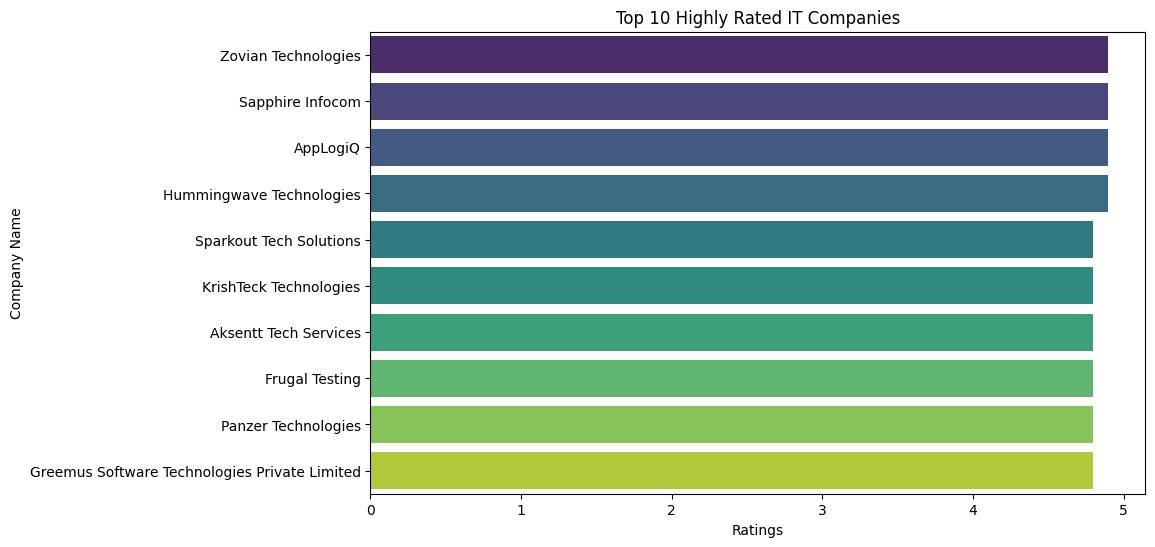

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,sphere,number_employees,city,year_old
3973,Zovian Technologies,IT Services & Consulting | 1-10 Employees | 8 ...,4.9,"Work Life Balance, Company Culture, Work Satis...",NaN,189.0,64.0,3.0,NaN,138.0,IT Services & Consulting,5,Bangalore,8
8623,Sapphire Infocom,IT Services & Consulting | 11-50 Employees | 3...,4.9,"Company Culture, Work Satisfaction, Skill Deve...",NaN,84.0,10.0,3.0,NaN,14.0,IT Services & Consulting,30,Ahmedabad,30
8966,AppLogiQ,IT Services & Consulting | 51-200 Employees | ...,4.9,"Skill Development / Learning, Company Culture,...",NaN,81.0,55.0,2.0,NaN,3.0,IT Services & Consulting,125,Tiruppu,4
3965,Hummingwave Technologies,IT Services & Consulting | 11-50 Employees | 1...,4.9,"Skill Development / Learning, Work Life Balanc...",NaN,189.0,170.0,1.0,1.0,12.0,IT Services & Consulting,30,Bangalore,11
9558,Sparkout Tech Solutions,IT Services & Consulting | 51-200 Employees | ...,4.8,"Job Security, Skill Development / Learning, Co...",NaN,76.0,95.0,2.0,NaN,3.0,IT Services & Consulting,125,Dove,7
5075,KrishTeck Technologies,IT Services & Consulting | 51-200 Employees | ...,4.8,"Job Security, Skill Development / Learning, Co...",NaN,146.0,19.0,6.0,NaN,1.0,IT Services & Consulting,125,Salem,14
2202,Aksentt Tech Services,IT Services & Consulting | 201-500 Employees |...,4.8,"Skill Development / Learning, Company Culture,...",NaN,331.0,267.0,19.0,3.0,17.0,IT Services & Consulting,350,Mumbai,17
5163,Frugal Testing,IT Services & Consulting | 51-200 Employees | ...,4.8,"Skill Development / Learning, Company Culture,...",NaN,143.0,71.0,4.0,1.0,2.0,IT Services & Consulting,125,Hyderabad,8
3807,Panzer Technologies,IT Services & Consulting | 201-500 Employees |...,4.8,"Skill Development / Learning, Work Life Balanc...",NaN,198.0,204.0,2.0,18.0,10.0,IT Services & Consulting,350,Hyderaba,18
4791,Greemus Software Technologies Private Limited,IT Services & Consulting | 201-500 Employees |...,4.8,"Skill Development / Learning, Company Culture,...",NaN,155.0,2.0,1.0,NaN,3.0,IT Services & Consulting,350,Hyderabad/Secunderabad,10


In [15]:
it_companies = data[(data['sphere'].str.contains('IT'))]

top_it_companies = it_companies.sort_values(by='Ratings', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_it_companies, x='Ratings', y='Company_name', palette='viridis')
plt.title('Top 10 Highly Rated IT Companies')
plt.xlabel('Ratings')
plt.ylabel('Company Name')
plt.show()
top_it_companies

### 5.2 Q2:

Top Cities with Higher Ratings and More Job Opportunities:
                           city  Ratings  Total_jobs_available
1122                    Tiruppu      4.9                   0.0
13     29079 Whitegate Highland      4.8                   0.0
323                        Dove      4.8                   0.0
993                    San Mate      4.7                  13.0
394                    Gajraula      4.7                   3.0
29                       Ahmadi      4.6                   0.0
727                    Metuchen      4.6                   0.0
121                   Bellandur      4.6                   0.0
890                     Pipitea      4.6                   1.0
904               Port Harcourt      4.6                   0.0


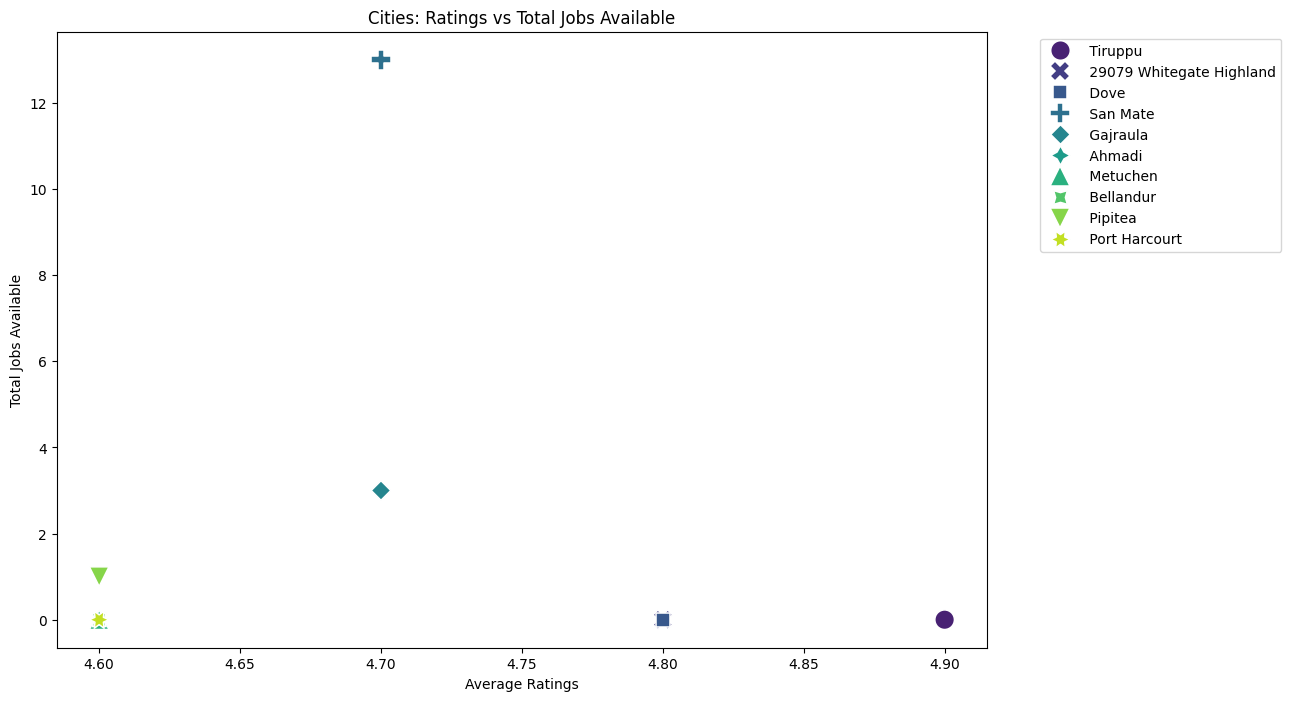

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by city and calculating average ratings and total jobs available
city_stats = data.groupby('city').agg({'Ratings': 'mean', 'Total_jobs_available': 'sum'}).reset_index()

# Sorting cities by average ratings in descending order
city_stats = city_stats.sort_values(by='Ratings', ascending=False).head(10)

# Displaying the top cities with higher average ratings and more job opportunities
print("Top Cities with Higher Ratings and More Job Opportunities:")
print(city_stats[['city', 'Ratings', 'Total_jobs_available']].head(10))

# Creating a scatter plot with markers representing city names
plt.figure(figsize=(12, 8))
sns.scatterplot(data=city_stats, x='Ratings', y='Total_jobs_available', hue='city', palette='viridis', s=200, style='city')
plt.title('Cities: Ratings vs Total Jobs Available')
plt.xlabel('Average Ratings')
plt.ylabel('Total Jobs Available')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 5.3 Q3:

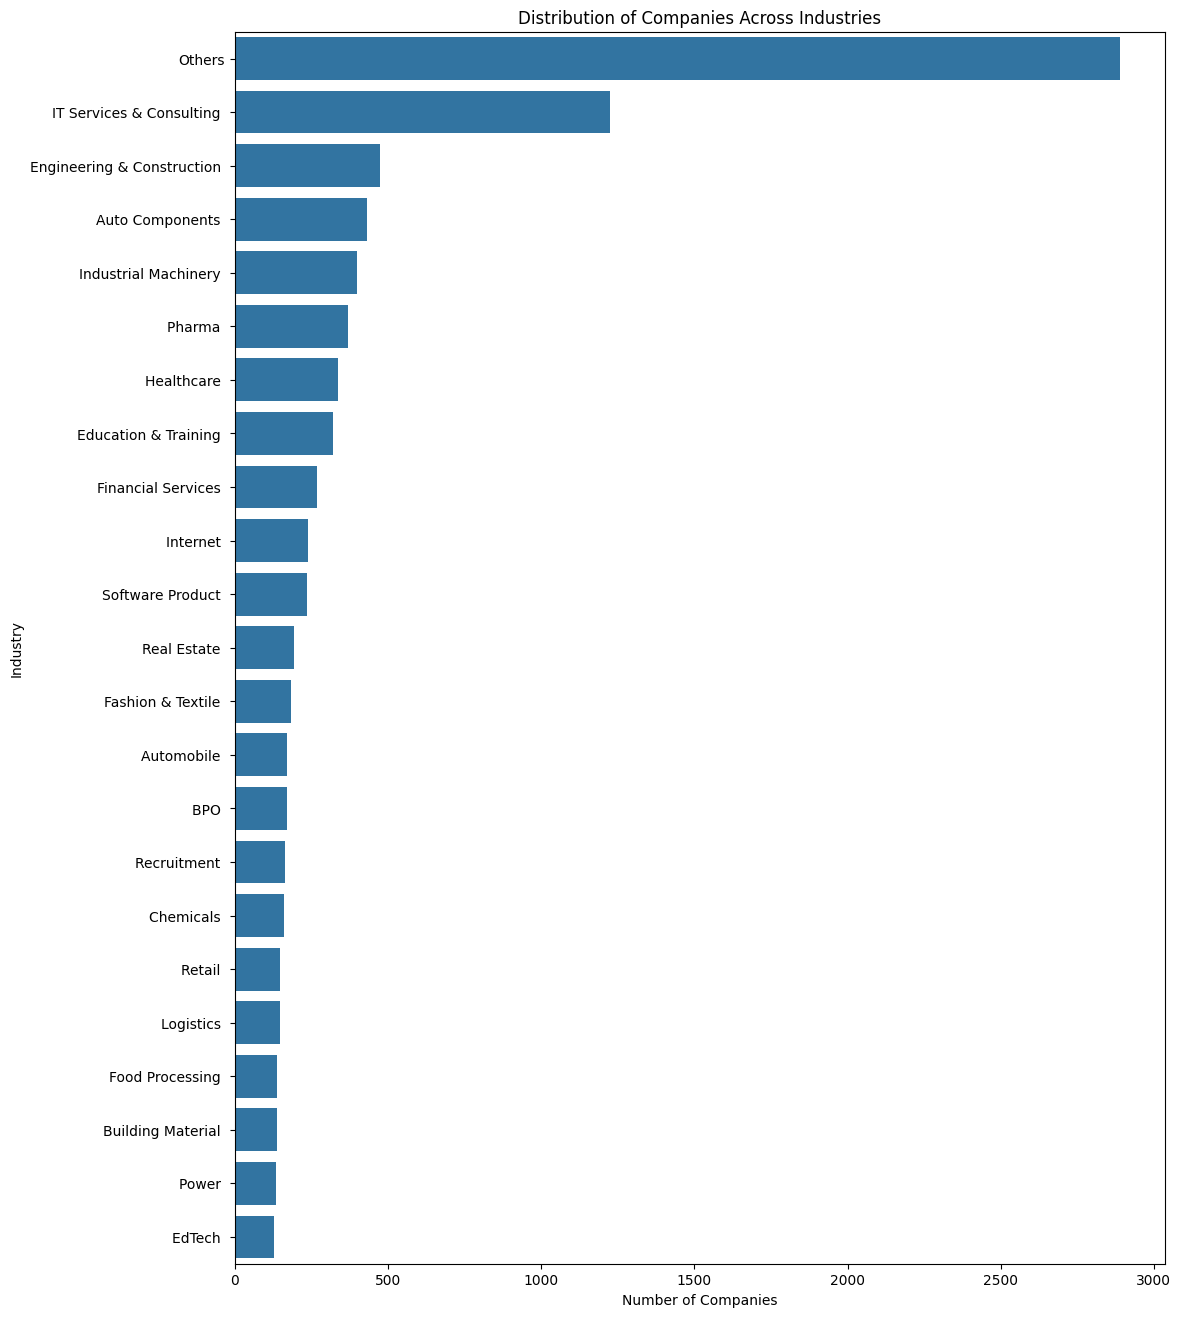

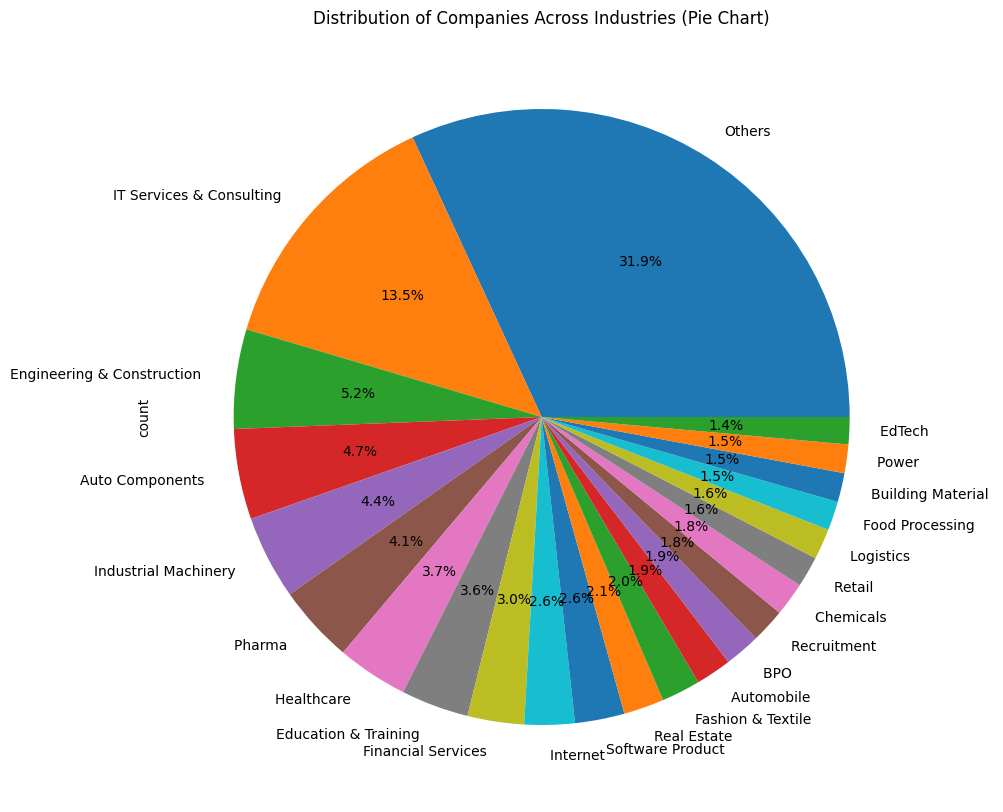

In [21]:
plt.figure(figsize=(12, 16))
sns.countplot(y='sphere', data=data, order=data['sphere'].value_counts().index)
plt.title('Distribution of Companies Across Industries')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()

# Additional: Pie chart for a clearer representation
percentage_distribution = data['sphere'].value_counts(normalize=True) * 100

threshold = 1.4
other_values = percentage_distribution[percentage_distribution < threshold]
data['sphere'] = data['sphere'].apply(lambda x: 'Others' if x in other_values else x)

plt.figure(figsize=(10, 10))
data['sphere'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Companies Across Industries (Pie Chart)')
plt.show()


### 5.4 Q4:

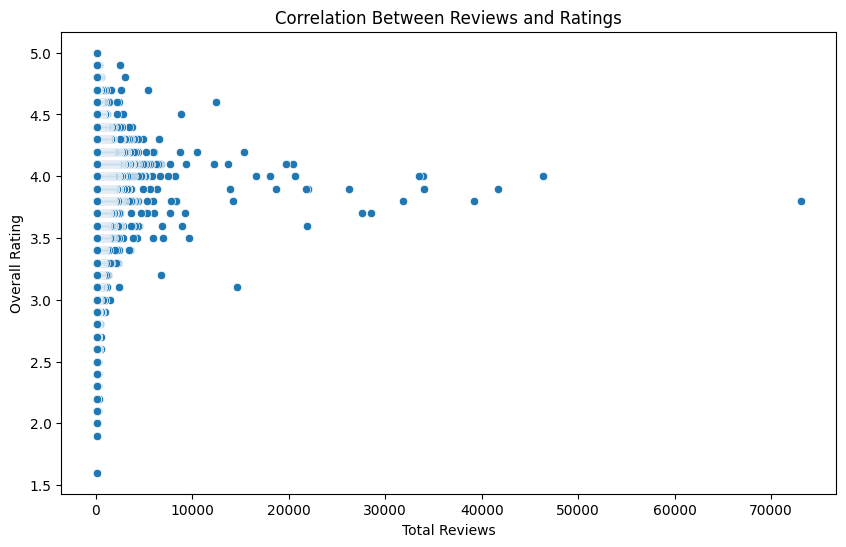

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_reviews', y='Ratings', data=data)
plt.title('Correlation Between Reviews and Ratings')
plt.xlabel('Total Reviews')
plt.ylabel('Overall Rating')
plt.show()

### 5.5 Q5: 

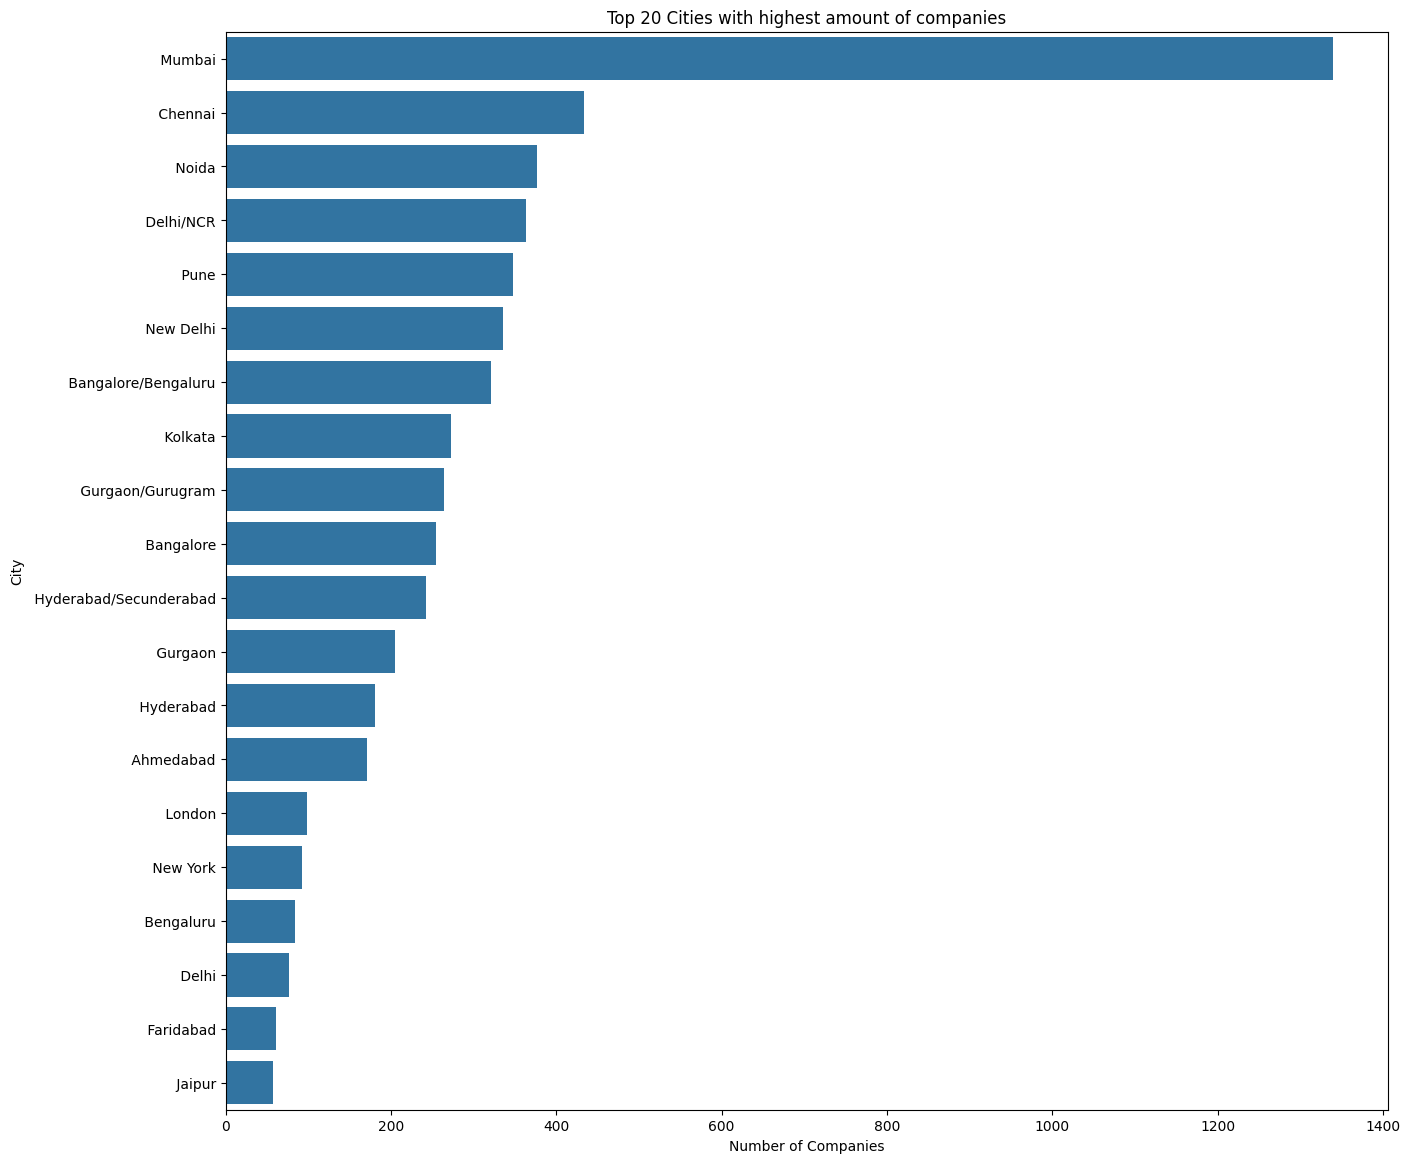

In [22]:
plt.figure(figsize=(15, 14))
sns.countplot(y='city', data=data, order=data['city'].value_counts().index[:20])
plt.title('Top 20 Cities with highest amount of companies')
plt.xlabel('Number of Companies')
plt.ylabel('City')
plt.show()

# Conclusion

## Top 10 Highly Rated IT Companies:
Through our analysis, we identified the top 10 highly rated companies in the field of Information Technology. Companies such as Zovian Technologies, Sapphire Infocom, and others demonstrate excellence and significant recognition in the industry. These companies serve as benchmarks for quality and innovation, reflecting the dynamic nature of the IT sector and the pursuit of excellence within it.

Implications:
Understanding the leaders in the IT sector provides valuable insights for benchmarking our own strategies against industry excellence. We can draw inspiration from their practices and innovations to enhance our competitive position and foster a culture of continuous improvement.

## Specific Cities with Higher Ratings and Employment Opportunities:
Our research pinpointed specific cities where companies typically have higher ratings and offer extensive employment opportunities. Cities like Tiurippu, Whitegate Highland, and others stand out for their favorable business environment and flourishing job markets. These cities not only attract talented professionals but also cultivate a culture of growth and innovation, making them ideal locations for both employers and job seekers.

Implications:
Identifying cities with higher ratings and employment opportunities allows us to strategically position our operations and tailor recruitment efforts. Understanding regional dynamics is crucial for effective expansion and talent acquisition.

## Distribution of Companies Across Industries:
The distribution of companies across various industries in the Top 10,000 Companies dataset provides valuable insights into the economic landscape. From IT services and consulting to healthcare and financial services, the dataset showcases the diversity of industries driving global trade. This distribution underscores the interconnectedness of sectors and the multifaceted nature of the modern economy.

Implications:
Recognizing the distribution of companies across industries informs our understanding of market trends and potential areas for diversification. It aids in strategic decision-making and positions us to capitalize on opportunities in different sectors.

## Correlation Between Company Reviews and Overall Ratings:
Our analysis revealed a noticeable correlation between the number of company reviews and its overall rating. Specifically, we observed a stronger correlation within the rating range of 3.5 to 4.5, indicating that companies with average to high ratings generally attract a greater number of reviews. This correlation emphasizes the importance of user reviews in shaping perceptions of a company's performance and reputation.

Implications:
Understanding the correlation between reviews and ratings highlights the significance of managing our online reputation. It underscores the need for actively engaging with user feedback to enhance our overall standing and influence stakeholders' perceptions.

## Geographical Distribution of Companies:
The geographical distribution of companies in the dataset provides valuable insights into regional business landscapes. Major cities such as Mumbai, Chennai, and Bangalore emerge as corporate hubs, reflecting the concentration of economic opportunities in these urban centers. This distribution underscores the regional diversity of corporate presence and highlights the importance of key metropolitan areas in driving economic growth and innovation.

Implications:
Analyzing the geographical distribution informs our strategic decisions regarding regional expansion, market targeting, and resource allocation. It allows us to tailor our approach to regional dynamics and capitalize on emerging business opportunities.

In conclusion, the comprehensive analysis of the Top 10,000 Companies dataset has provided actionable insights for strategic decision-making. These findings empower us to benchmark against industry leaders, strategically position ourselves in high-potential cities, understand industry dynamics, manage our online reputation effectively, and make informed decisions regarding regional operations. The knowledge gained from this analysis positions us for success in navigating the complex landscape of corporate entities.